In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

#from matplotlib.ticker import FuncFormatter # for custom number format on x and y axis
#from io import StringIO
#from scipy import stats
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
pd.set_option('display.max_rows', 10)

In [3]:
st = pd.read_excel('SampleData/logdataVpVs.xlsx') #use sample# as index column
st

,DEPTH,DTCO,DTSM,RHOZ
0,693.4200,156.0565,469.2656,4.5631
1,693.5724,155.0785,446.2663,4.5650
2,693.7248,153.8340,436.9780,4.5756
3,693.8772,151.9469,432.6328,4.5771
4,694.0296,150.8684,425.2656,4.5780
...,...,...,...,...
10964,2364.3336,108.0000,214.5455,2.3224
10965,2364.4860,108.0000,214.5455,2.3121
10966,2364.6384,108.0000,214.5455,2.2996
10967,2364.7908,108.0000,214.5455,2.2953


In [4]:
st['Vp(m_s)']= (1/ st['DTCO'])* (0.3048/ 10**-6)
st['Vs(m_s)']= (1/ st['DTSM'])* (0.3048/ 10**-6)
st

,DEPTH,DTCO,DTSM,RHOZ,Vp(m_s),Vs(m_s)
0,693.4200,156.0565,469.2656,4.5631,1953.138767,649.525557
1,693.5724,155.0785,446.2663,4.5650,1965.456204,683.000262
2,693.7248,153.8340,436.9780,4.5756,1981.356527,697.517953
3,693.8772,151.9469,432.6328,4.5771,2005.963926,704.523559
4,694.0296,150.8684,425.2656,4.5780,2020.303788,716.728557
...,...,...,...,...,...,...
10964,2364.3336,108.0000,214.5455,2.3224,2822.222222,1420.677665
10965,2364.4860,108.0000,214.5455,2.3121,2822.222222,1420.677665
10966,2364.6384,108.0000,214.5455,2.2996,2822.222222,1420.677665
10967,2364.7908,108.0000,214.5455,2.2953,2822.222222,1420.677665


Text(0.5, 0, 'Vs(m/s)')

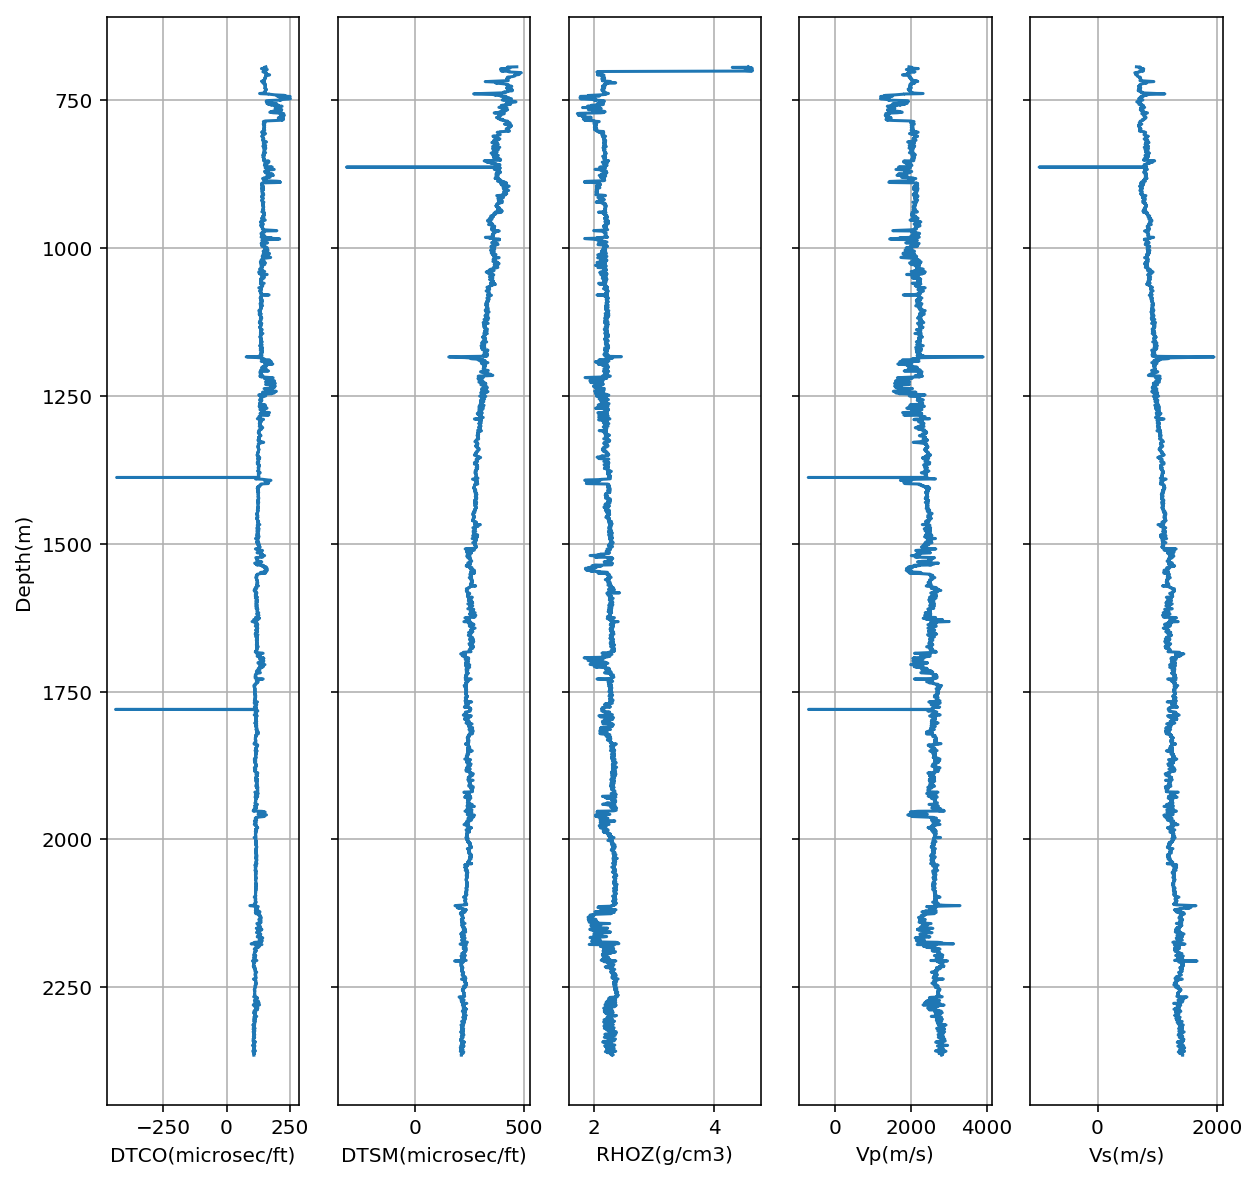

In [5]:
fig, ax = plt.subplots(1,5,sharey=True)
fig.set_size_inches(10,10)

plt.sca(ax[0])
plt.plot(st['DTCO'], st['DEPTH'])
plt.grid()
ax[0].invert_yaxis()
plt.ylabel('Depth(m)')
plt.xlabel('DTCO(microsec/ft)')

    
plt.sca(ax[1])
plt.plot(st['DTSM'], st['DEPTH'])
plt.grid()
plt.xlabel('DTSM(microsec/ft)')
    
plt.sca(ax[2])
plt.plot(st['RHOZ'], st['DEPTH'])
plt.grid()
plt.xlabel('RHOZ(g/cm3)')

plt.sca(ax[3])
plt.plot(st['Vp(m_s)'], st['DEPTH'])
plt.grid()
plt.xlabel('Vp(m/s)')
    
plt.sca(ax[4])
plt.plot(st['Vs(m_s)'], st['DEPTH'])
plt.grid()
plt.xlabel('Vs(m/s)')

In [6]:
st2= st

In [7]:
mean1, sigma1 = st['DTCO'].mean(), st['DTCO'].std()

mean2, sigma2 = st['DTSM'].mean(), st['DTSM'].std()

mean3, sigma3 = st['RHOZ'].mean(), st['RHOZ'].std()

In [8]:
conf_int_DTCO = stats.norm.interval(0.995, loc=mean1, scale=sigma1)

conf_int_DTSM = stats.norm.interval(0.995, loc=mean2, scale=sigma2)

conf_int_RHOZ = stats.norm.interval(0.995, loc=mean3, scale=sigma3)

In [9]:
indDTCO_l= st2.index[st2['DTCO'] < conf_int_DTCO[0]].tolist()
indDTCO_h= st2.index[st2['DTCO'] > conf_int_DTCO[1]].tolist()

indDTSM_l= st2.index[st2['DTSM'] < conf_int_DTSM[0]].tolist()
indDTSM_h= st2.index[st2['DTSM'] > conf_int_DTSM[1]].tolist()

indRHOZ_l= st2.index[st2['RHOZ'] < conf_int_RHOZ[0]].tolist()
indRHOZ_h= st2.index[st2['RHOZ'] > conf_int_RHOZ[1]].tolist()

u_ind= indDTCO_l+ indDTCO_h+ indDTSM_l+ indDTSM_h+ indRHOZ_l+ indRHOZ_h
u_ind

[4557,
 7131,
 312,
 313,
 314,
 315,
 316,
 317,
 318,
 319,
 320,
 321,
 322,
 323,
 324,
 325,
 326,
 327,
 328,
 329,
 330,
 331,
 332,
 333,
 334,
 335,
 336,
 337,
 338,
 339,
 340,
 341,
 342,
 343,
 344,
 345,
 346,
 347,
 348,
 349,
 350,
 351,
 352,
 353,
 354,
 355,
 356,
 357,
 358,
 359,
 360,
 361,
 362,
 363,
 364,
 365,
 366,
 367,
 368,
 369,
 370,
 371,
 409,
 410,
 426,
 427,
 428,
 429,
 434,
 435,
 436,
 437,
 438,
 439,
 440,
 441,
 442,
 443,
 444,
 445,
 446,
 447,
 448,
 449,
 450,
 451,
 452,
 453,
 454,
 455,
 456,
 457,
 458,
 459,
 460,
 461,
 463,
 464,
 465,
 466,
 467,
 468,
 469,
 470,
 471,
 472,
 473,
 474,
 475,
 476,
 477,
 478,
 479,
 480,
 481,
 482,
 483,
 484,
 485,
 486,
 487,
 488,
 489,
 490,
 511,
 512,
 513,
 514,
 515,
 516,
 517,
 518,
 519,
 520,
 521,
 522,
 523,
 524,
 525,
 526,
 527,
 528,
 529,
 530,
 531,
 532,
 533,
 534,
 535,
 536,
 537,
 538,
 539,
 540,
 541,
 542,
 543,
 544,
 545,
 546,
 547,
 548,
 549,
 550,
 551,
 552,
 5

In [10]:
st2= st2.drop(u_ind)
st2

,DEPTH,DTCO,DTSM,RHOZ,Vp(m_s),Vs(m_s)
50,701.0400,148.2507,432.6303,2.4790,2055.976801,704.527630
51,701.1924,151.7425,434.2779,2.1707,2008.665997,701.854734
52,701.3448,153.7459,434.4684,2.0793,1982.491891,701.546994
53,701.4972,150.6211,434.4684,2.0716,2023.620861,701.546994
54,701.6496,147.2354,433.6620,2.0753,2070.154324,702.851530
...,...,...,...,...,...,...
10964,2364.3336,108.0000,214.5455,2.3224,2822.222222,1420.677665
10965,2364.4860,108.0000,214.5455,2.3121,2822.222222,1420.677665
10966,2364.6384,108.0000,214.5455,2.2996,2822.222222,1420.677665
10967,2364.7908,108.0000,214.5455,2.2953,2822.222222,1420.677665


In [11]:
st2['Vp(m_s)']= (1/ st2['DTCO'])* (0.3048/ 10**-6)
st2['Vs(m_s)']= (1/ st2['DTSM'])* (0.3048/ 10**-6)
st2

,DEPTH,DTCO,DTSM,RHOZ,Vp(m_s),Vs(m_s)
50,701.0400,148.2507,432.6303,2.4790,2055.976801,704.527630
51,701.1924,151.7425,434.2779,2.1707,2008.665997,701.854734
52,701.3448,153.7459,434.4684,2.0793,1982.491891,701.546994
53,701.4972,150.6211,434.4684,2.0716,2023.620861,701.546994
54,701.6496,147.2354,433.6620,2.0753,2070.154324,702.851530
...,...,...,...,...,...,...
10964,2364.3336,108.0000,214.5455,2.3224,2822.222222,1420.677665
10965,2364.4860,108.0000,214.5455,2.3121,2822.222222,1420.677665
10966,2364.6384,108.0000,214.5455,2.2996,2822.222222,1420.677665
10967,2364.7908,108.0000,214.5455,2.2953,2822.222222,1420.677665


Text(0.5, 0, 'Vs(m/s)')

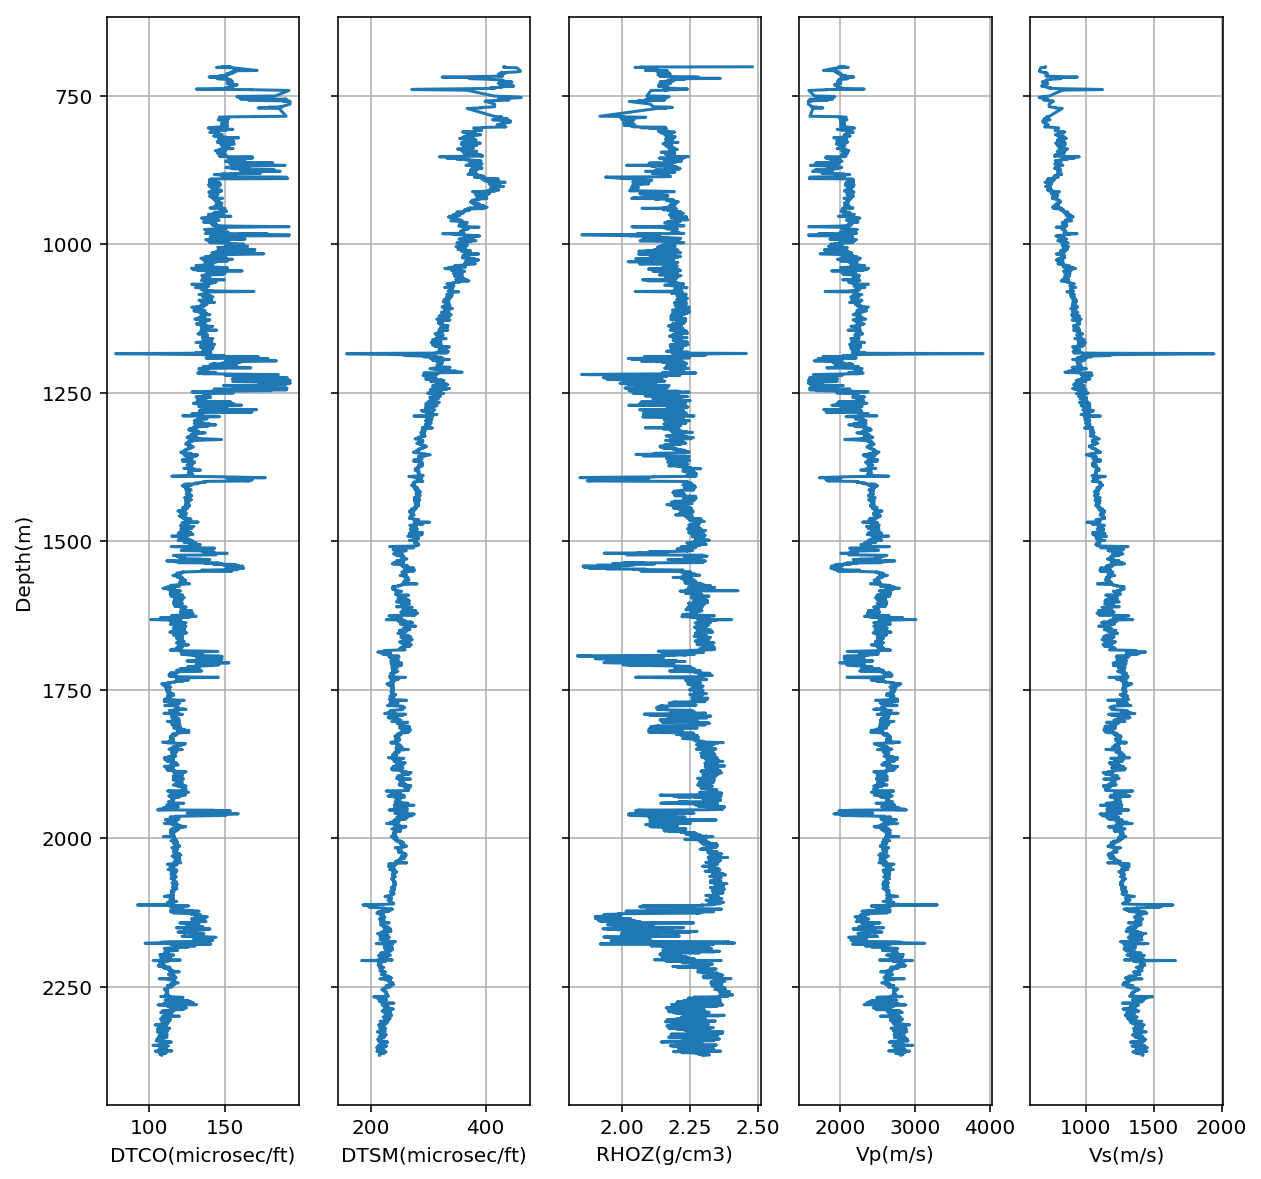

In [12]:
fig, ax_1 = plt.subplots(1,5,sharey=True)
fig.set_size_inches(10,10)

plt.sca(ax_1[0])
plt.plot(st2['DTCO'], st2['DEPTH'])
plt.grid()
ax_1[0].invert_yaxis()
plt.ylabel('Depth(m)')
plt.xlabel('DTCO(microsec/ft)')

    
plt.sca(ax_1[1])
plt.plot(st2['DTSM'], st2['DEPTH'])
plt.grid()
plt.xlabel('DTSM(microsec/ft)')
    
plt.sca(ax_1[2])
plt.plot(st2['RHOZ'], st2['DEPTH'])
plt.grid()
plt.xlabel('RHOZ(g/cm3)')

plt.sca(ax_1[3])
plt.plot(st2['Vp(m_s)'], st2['DEPTH'])
plt.grid()
plt.xlabel('Vp(m/s)')
    
plt.sca(ax_1[4])
plt.plot(st2['Vs(m_s)'], st2['DEPTH'])
plt.grid()
plt.xlabel('Vs(m/s)')